In [3]:
from ga import *
import pickle
import matplotlib.pyplot as plt

Binary
Real0 done


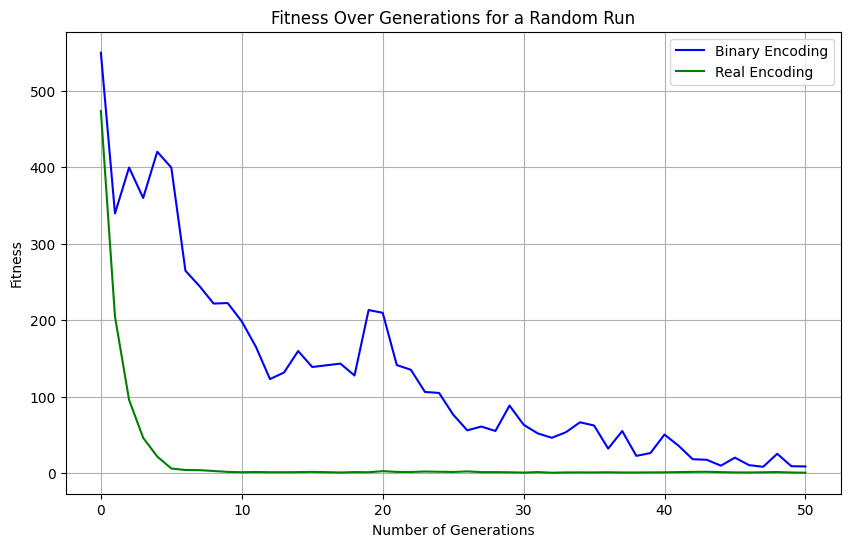

In [4]:
print('Binary')
avg_bin, std_bin, max_bin = ga_solve(100, f_A, [(-2.048, 2.048),(-2.048, 2.048)], n = 2, binary = True, minimization = True, 
                                    n_generations = 50,pc=0.9, precision_digits=4)
print('Real')
avg_real, std_real, max_real = ga_solve(100, f_A, [(-2.048, 2.048),(-2.048, 2.048)], n = 2, binary = False, minimization = True, 
                                    n_generations = 50,pc=0.9, precision_digits=4)

data = {
    'avg_bin': avg_bin,
    'std_bin': std_bin,
    'max_bin': max_bin,
    'avg_real': avg_real,
    'std_real': std_real,
    'max_real': max_real
}

with open('pickles/ga_fa_results.pkl', 'wb') as f:
    pickle.dump(data, f)

with open('pickles/ga_fa_results.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables
avg_bin = data['avg_bin']
std_bin = data['std_bin']
max_bin = data['max_bin']
avg_real = data['avg_real']
std_real = data['std_real']
max_real = data['max_real']

plt.figure(figsize=(10, 6))
plt.plot(avg_bin, label='Binary Encoding', color='blue', linestyle='-')
plt.plot(avg_real, label='Real Encoding', color='green', linestyle='-')
plt.xlabel('Number of Generations')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations for a Random Run')
plt.legend()
plt.grid(True)
plt.show()

Binary


/mnt/d/sharegit/EvoComp/HW2_Evolutionary_Computation/functions.py:224: RuntimeWarning: invalid value encountered in divide
  pop_prob_cum = np.cumsum(population_fitness / np.sum(population_fitness))


Real0 done


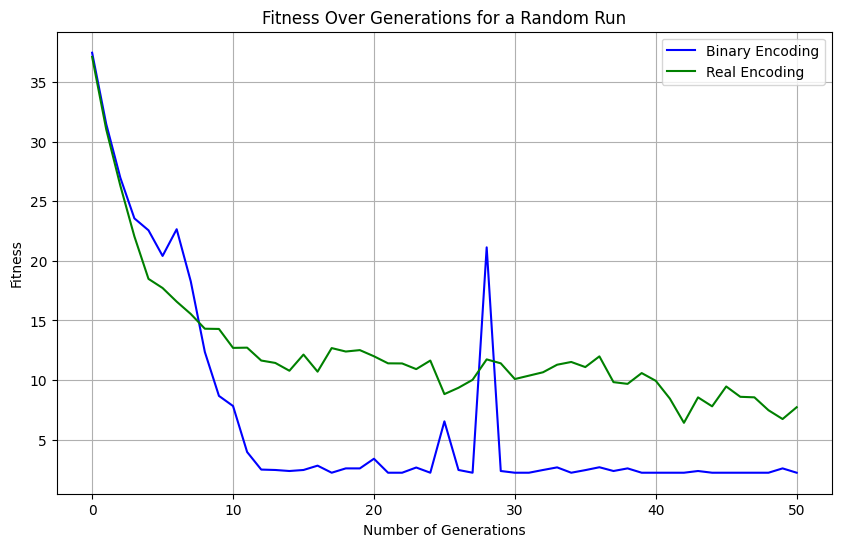

In [5]:
print('Binary')
avg_bin, std_bin, max_bin = ga_solve(100, f_B, [(-5.12, 5.12),(-5.12, 5.12)], n = 2, binary = True, minimization = True, 
                                    n_generations = 50,pc=0.9, precision_digits=4)
print('Real')
avg_real, std_real, max_real = ga_solve(100, f_B, [(-5.12, 5.12),(-5.12, 5.12)], n = 2, binary = False, minimization = True, 
                                    n_generations = 50,pc=0.9, precision_digits=4)

data = {
    'avg_bin': avg_bin,
    'std_bin': std_bin,
    'max_bin': max_bin,
    'avg_real': avg_real,
    'std_real': std_real,
    'max_real': max_real
}

with open('pickles/ga_fb_results.pkl', 'wb') as f:
    pickle.dump(data, f)

with open('pickles/ga_fb_results.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables
avg_bin = data['avg_bin']
std_bin = data['std_bin']
max_bin = data['max_bin']
avg_real = data['avg_real']
std_real = data['std_real']
max_real = data['max_real']

plt.figure(figsize=(10, 6))
plt.plot(avg_bin, label='Binary Encoding', color='blue', linestyle='-')
plt.plot(avg_real, label='Real Encoding', color='green', linestyle='-')
plt.xlabel('Number of Generations')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations for a Random Run')
plt.legend()
plt.grid(True)
plt.show()

Binary
Real0 done


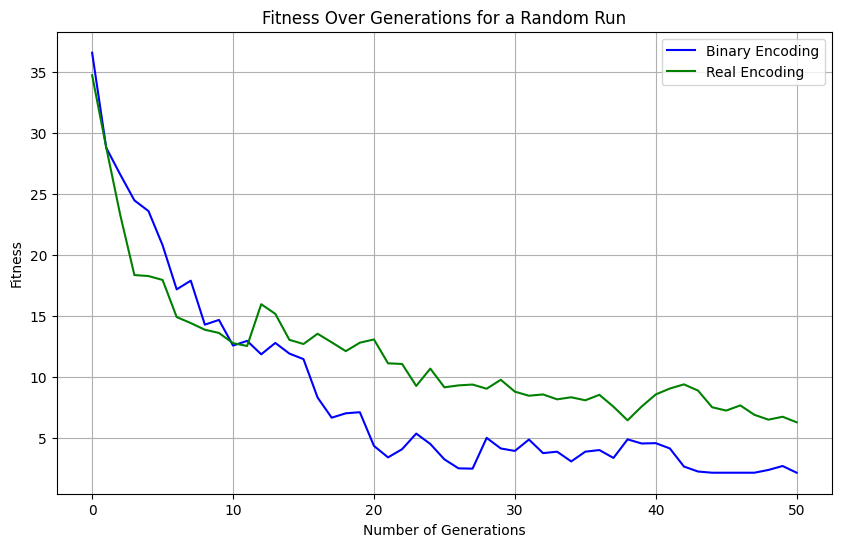

In [6]:
print('Binary')
avg_bin, std_bin, max_bin = ga_solve(100, f_B, [(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12)], 
                                    n = 5, binary = True, minimization = True, 
                                    n_generations = 50,pc=0.9, precision_digits=4)
print('Real')
avg_real, std_real, max_real = ga_solve(100, f_B, [(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12)], 
                                    n = 5, binary = False, minimization = True, 
                                    n_generations = 50,pc=0.9, precision_digits=4)

data = {
    'avg_bin': avg_bin,
    'std_bin': std_bin,
    'max_bin': max_bin,
    'avg_real': avg_real,
    'std_real': std_real,
    'max_real': max_real
}

with open('pickles/ga_fc_results.pkl', 'wb') as f:
    pickle.dump(data, f)

with open('pickles/ga_fc_results.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables
avg_bin = data['avg_bin']
std_bin = data['std_bin']
max_bin = data['max_bin']
avg_real = data['avg_real']
std_real = data['std_real']
max_real = data['max_real']

plt.figure(figsize=(10, 6))
plt.plot(avg_bin, label='Binary Encoding', color='blue', linestyle='-')
plt.plot(avg_real, label='Real Encoding', color='green', linestyle='-')
plt.xlabel('Number of Generations')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations for a Random Run')
plt.legend()
plt.grid(True)
plt.show()

### Tests real

In [18]:
population = []
for i in range(100):
    individual = initialize(2, False, constraints = [(-2.058,2.058), (-2.058,2.058)]) # np.arrays
    population.append(individual)
print(population[1])

[-0.47237466  0.05632262]


In [37]:
f_x = f_A
binary = False
constraints  = [(-2.058,2.058), (-2.058,2.058)]
precision_digits = 4
avg_fitness_list = []
std_fitness_list = []
max_fitness_list = []
mu = 100
pc = 0.9
p_m = 0.8
t = 0 # generation

minimization = True
population_fitness = eval_population(population, f_x, binary, constraints, precision_digits)
avg_fitness_list.append(np.mean(population_fitness))
std_fitness_list.append(np.std(population_fitness))
max_fitness_list.append(np.min(population_fitness))
selected_population = list()

In [38]:
winners_1 = tournament_selection(population, f_x, binary=binary, minimization=minimization) # Half of the individuals selected
winners_2 = tournament_selection(population, f_x, binary=binary, minimization=minimization) # Half of the individuals selected
selected_population = np.append(winners_1,winners_2)

selected_population = [population[i] for i in selected_population]

list_children = []

In [40]:
def parameter_based_mutation(y, constraints, t):
    """
    Given a real encoded parent, it returns a child that resulted from mutating the parent

    Parameters:
    - y (np.array): Real encoded values of parent (single parent)
    - constraints (list of tuples): Defining lower and upper limits for the real variable.
    - t (int): generation number

    Returns:
    - y_mut (np.array): Real encoded values of child (mutated)
    """
    if y.ndim != 1:
        raise ValueError("y should be a one dimension np.array")
    
    y_mut = np.empty_like(y)

    eta_m = 100 + t 
    for i, y_i in enumerate(y): # Independently mutate every value from y
        y_l, y_u = constraints[i]
        
        delta_max = y_u - y_l
        delta = min(y_i-y_l,(y_u-y_i))/(delta_max)

        beta_q = beta_q_factor(delta=delta, eta_m=eta_m)

        y_mut[i] = y_i + beta_q * delta_max

    return y_mut
print(parent1)
for i in range(0, mu, 2): # 1, 3
    parent1, parent2 = selected_population[i], selected_population[i+1]
    print(parent1)
    filter_crossover = random.random()
    if filter_crossover < pc:
        child1, child2 = sbx(parent1, parent2, nc=20)
    else:
        child1, child2 = parent1, parent2

    print(child1)
    child1 = parameter_based_mutation(child1,constraints=constraints,t=t)
    child2 = parameter_based_mutation(child1,constraints=constraints,t=t)

    list_children.append(child1)
    list_children.append(child2)

[-1.79637536 -0.41003311]
[-1.79637536 -0.41003311]
[-1.78154874 -0.41736878]
[-1.30892835  0.33539919]
[-1.30892835  0.33539919]
[ 0.68727179 -1.58470852]
[ 0.71871647 -1.63239059]
[-0.59767023  0.09571649]
[-0.60563194  0.18667265]
[1.66214766 1.70521631]
[1.58574976 1.6815786 ]
[0.38763734 0.96926681]
[0.38294316 0.96377689]
[1.40410518 1.84928398]
[1.43170001 1.85479154]
[-1.65017745  1.7955568 ]
[-1.65236708  1.79761286]
[1.14310147 1.93768412]
[1.14310147 1.93768412]
[-0.96066625  0.23199901]
[-0.97521192  0.24534345]
[ 0.07373998 -0.91502316]
[ 0.07074762 -0.8894304 ]
[-0.13894286 -0.06627881]
[-0.14939051 -0.06549906]
[-0.86866788 -0.3141355 ]
[-0.86944819 -0.30531186]
[0.57891459 0.690173  ]
[0.57662826 0.68614499]
[0.20577804 0.65246478]
[0.18599176 0.64182964]
[ 0.41391504 -0.40172486]
[ 0.43395401 -0.36846827]
[ 0.19702512 -0.29924688]
[ 0.20898415 -0.31511161]
[-0.03034901 -0.87129655]
[ 7.10781700e-04 -8.96842173e-01]
[-0.59018047  1.9461307 ]
[-0.59018047  1.9461307 ]
[ 

### Tetss binary

In [6]:
x_init = initialize(2, True, precision_digits = 4, constraints = [(-2.058,2.058), (-2.058,2.058)])
print(x_init)

['1001' '0111']


In [7]:
population = []
for i in range(100):
    individual = initialize(2, True, constraints =  [(-5.12, 5.12),(-5.12, 5.12)]) # np.arrays
    population.append(individual)

In [5]:
def decode_binary(binary_str_list, constraints, precision_digits=4):
    """
    Decodes a single binary string to its corresponding real value based on constraints.

    Parameters:
    
    - binary_str (str): Encoded binary string for a single variable.
    - constraint (tuple): (low, high) limits for the real variable.
    - precision_digits (int): Number of decimal places of precision.

    Returns:
    - float: Decoded real value."""
    #print(binary_str_list)
    decoded_list = []
    for binary_str, constraint in zip(binary_str_list,constraints):
        low, high = constraint  # Unpack the constraint tuple
        integer_value = int(binary_str, 2)
        max_integer_value = (2 ** len(binary_str)) - 1
        normalized_value = integer_value / max_integer_value
        decoded = low + (high - low) * normalized_value
        decoded_list.append(round(decoded, precision_digits))
    return decoded_list
    
def decode_population(binary_array, constraints, precision_digits=4):
    """
    Takes a numpy array of binary strings and decodes into a numpy array of real values
    
    Parameters:
    - binary_array (np.array): Array of binary-encoded variables
    - constraints (list of tuples): Defining lower and upper limits for the real variable.
    - precision_digits (int): number of digits of precision if the representation is binary.
    
    Returns:
    np.array: Decoded real values for the entire population
    """
    decoded_population = np.zeros_like(binary_array)
    
    for i, binary_strs in enumerate(binary_array):
        decoded_array = [] 
        decoded_value = decode_binary(binary_strs, constraints, precision_digits)
        decoded_population[i] = decoded_value
    
    return np.array(decoded_population)
    
def eval_population(population, obj_func, binary, constraints, precision_digits=4):
    """
    Parameters:
    - population (list of np.ndarray): list of individuals
    - f_x (sympy exp): the fitness function
    - binary (Boolean): True if binary encoding, False if real encoding
    - constraints (list of tuples): Defining lower and upper limits for each variable.
    - precision_digits (int): number or digits of precision if the representation is binary.
    
    Returns:
    - population_fitness(list)
    """
    population_fitness = np.zeros(len(population))

    if binary:
        population = decode_population(population, constraints, precision_digits)

    for i, ind in enumerate(population):
        population_fitness[i] = eval_sympy(obj_func, ind)

    return np.array(population_fitness)

In [10]:
f_x = f_C
binary = True
constraints  = [(-5.12, 5.12),(-5.12, 5.12)]
precision_digits = 4
avg_fitness_list = []
std_fitness_list = []
max_fitness_list = []
mu = 100
pc = 0.9
p_m = 0.8
minimization = True

print(f_x)
population_fitness = eval_population(population, f_x, binary, constraints, precision_digits)
avg_fitness_list.append(np.mean(population_fitness))
std_fitness_list.append(np.std(population_fitness))
max_fitness_list.append(np.min(population_fitness))
selected_population = list()

t = 0 # generation
 
for i in range(mu):
    individual = roulete_wheel(population,f_x,constraints=constraints,minimization=minimization)
    selected_population.append(individual)

shuffled_indices = np.random.permutation(mu) # 1, 2, 3, 4 --> 2, 4, 1, 3
selected_population = [selected_population[i] for i in shuffled_indices]

list_children = []

x1**2 + x2**2 + x3**2 + x4**2 + x5**2 - 10*cos(2*pi*x1) - 10*cos(2*pi*x2) - 10*cos(2*pi*x3) - 10*cos(2*pi*x4) - 10*cos(2*pi*x5) + 50


TypeError: Cannot convert expression to float

In [7]:
def constraint_checker(x, constraints, binary, precision_digits=4):
    """
    Checks if the new the solution of the problem is within the constraint of a problem

    Parameters:
    - x (np.ndarray): New solution to the problem
    - constraints (list of list): Defining lower and upper limits for each variable e.g. [[-3, 3], [-2, 2]]

    Returns:
    - Boolean: True if solution is within the constraints, False otherwise
    """
    if binary:
        x = np.array(decode_binary(x, constraints, precision_digits))
    if len(constraints) == 0:
        return True  # No constraints provided, always return True
    
    for i in range(len(x)):
        if not (constraints[i][0] <= x[i] <= constraints[i][1]):
            return False
    return x

for i in range(0, mu, 2): # 1, 3
    parent1, parent2 = selected_population[i], selected_population[i+1]

    #QC = False
    #while QC != True:
    filter_crossover = random.random()
    if filter_crossover < pc:
        child1, child2 = point_crossover(parent1, parent2)
    else:
        child1, child2 = parent1, parent2

        #QC = constraint_checker(child1,constraints,binary, precision_digits) and constraint_checker(child2,constraints,binary, precision_digits)

    child1_gene = np.random.randint(0, len(child1)) # To be mutated  
    child1[child1_gene] = binary_mutation(child1[child1_gene], p = p_m)

    child2_gene = np.random.randint(0, len(child2)) # To be mutated
    child1[child2_gene] = binary_mutation(child2[child2_gene], p = p_m)

    child1, child2 = constraint_checker(child1, constraints, binary), constraint_checker(child2, constraints, binary)

    list_children.append(child1)
    list_children.append(child2)

[array([1.2348, 0.9604]), array([-0.9604,  0.9604]), array([-0.686,  0.686]), array([-0.1372,  0.9604]), array([-0.9604,  0.9604]), array([ 1.2348, -2.058 ]), array([-1.7836,  0.1372]), array([0.1372, 0.4116]), array([-1.2348, -0.9604]), array([-0.1372,  0.1372]), array([1.5092, 0.1372]), array([ 2.058, -0.686]), array([ 0.4116, -1.2348]), array([-1.7836, -1.7836]), array([-1.5092, -2.058 ]), array([ 0.9604, -1.5092]), array([-1.7836,  1.7836]), array([-0.686 ,  0.9604]), array([-1.5092,  0.9604]), array([-0.4116,  0.686 ]), array([1.7836, 2.058 ]), array([-0.4116,  1.7836]), array([ 0.4116, -1.2348]), array([ 0.1372, -1.2348]), array([-0.686, -0.686]), array([ 0.1372, -0.686 ]), array([-0.1372,  1.7836]), array([0.686 , 1.7836]), array([1.5092, 0.4116]), array([1.2348, 1.5092]), array([1.7836, 0.4116]), array([0.686 , 1.7836]), array([1.2348, 0.686 ]), array([-0.9604, -0.4116]), array([1.2348, 2.058 ]), array([ 0.1372, -0.9604]), array([-0.4116, -0.9604]), array([-0.686, -0.686]), arr

In [9]:
population

[array(['1100', '0111'], dtype='<U4'),
 array(['1101', '0000'], dtype='<U4'),
 array(['0110', '0100'], dtype='<U4'),
 array(['0111', '1110'], dtype='<U4'),
 array(['0101', '1110'], dtype='<U4'),
 array(['0111', '1000'], dtype='<U4'),
 array(['0000', '1011'], dtype='<U4'),
 array(['0111', '1011'], dtype='<U4'),
 array(['1001', '0000'], dtype='<U4'),
 array(['1000', '1000'], dtype='<U4'),
 array(['0100', '1001'], dtype='<U4'),
 array(['0011', '0000'], dtype='<U4'),
 array(['1101', '1110'], dtype='<U4'),
 array(['1000', '0011'], dtype='<U4'),
 array(['1010', '1100'], dtype='<U4'),
 array(['0011', '0010'], dtype='<U4'),
 array(['0000', '0110'], dtype='<U4'),
 array(['0111', '0000'], dtype='<U4'),
 array(['1100', '1001'], dtype='<U4'),
 array(['1001', '0100'], dtype='<U4'),
 array(['1010', '1001'], dtype='<U4'),
 array(['1001', '0011'], dtype='<U4'),
 array(['1001', '1011'], dtype='<U4'),
 array(['0111', '1011'], dtype='<U4'),
 array(['1011', '1001'], dtype='<U4'),
 array(['0101', '1011'], 

In [8]:
list_children

[array([1.2348, 0.9604]),
 array([-0.9604,  0.9604]),
 array([-0.686,  0.686]),
 array([-0.1372,  0.9604]),
 array([-0.9604,  0.9604]),
 array([ 1.2348, -2.058 ]),
 array([-1.7836,  0.1372]),
 array([0.1372, 0.4116]),
 array([-1.2348, -0.9604]),
 array([-0.1372,  0.1372]),
 array([1.5092, 0.1372]),
 array([ 2.058, -0.686]),
 array([ 0.4116, -1.2348]),
 array([-1.7836, -1.7836]),
 array([-1.5092, -2.058 ]),
 array([ 0.9604, -1.5092]),
 array([-1.7836,  1.7836]),
 array([-0.686 ,  0.9604]),
 array([-1.5092,  0.9604]),
 array([-0.4116,  0.686 ]),
 array([1.7836, 2.058 ]),
 array([-0.4116,  1.7836]),
 array([ 0.4116, -1.2348]),
 array([ 0.1372, -1.2348]),
 array([-0.686, -0.686]),
 array([ 0.1372, -0.686 ]),
 array([-0.1372,  1.7836]),
 array([0.686 , 1.7836]),
 array([1.5092, 0.4116]),
 array([1.2348, 1.5092]),
 array([1.7836, 0.4116]),
 array([0.686 , 1.7836]),
 array([1.2348, 0.686 ]),
 array([-0.9604, -0.4116]),
 array([1.2348, 2.058 ]),
 array([ 0.1372, -0.9604]),
 array([-0.4116, -0.

In [6]:
def decode_population(binary_array, constraints, precision_digits=4):
    """
    Takes a numpy array of binary strings and decodes into a numpy array of real values
    
    Parameters:
    - binary_array (np.array): Array of binary-encoded variables
    - constraints (list of tuples): Defining lower and upper limits for the real variable.
    - precision_digits (int): number of digits of precision if the representation is binary.
    
    Returns:
    np.array: Decoded real values for the entire population
    """
    decoded_population = np.zeros((len(binary_array), len(constraints)))
    
    for i, binary_strs in enumerate(binary_array):
        decoded_array = [] 
        for binary_str in binary_strs:
            decoded_value = decode_binary(binary_str, constraints, precision_digits)
            decoded_array.append(decoded_value)
        
        decoded_population[i, :] = decoded_array
    
    return np.array(decoded_population)

In [2]:
avg, std, max = ga_solve(200, True, f_A, [(-2.048, 2.048),(-2.048, 2.048)],True, 2)

TypeError: cannot unpack non-iterable float object

### Test david

In [4]:
def obj_func_numpy(x):
    f_A_lambdified = sp.lambdify((sp.symbols('x1'), sp.symbols('x2')), f_A, 'numpy')
    return f_A_lambdified(x[0], x[1])

# Define bounds for the differential evolution
bounds = [(-2.048, 2.048),(-2.048, 2.048)]

from scipy.optimize import differential_evolution

# Run the differential evolution algorithm
result = differential_evolution(obj_func_numpy, bounds)

In [6]:
print(f"True minimum found by differential evolution at x1 = {result.x[0]:.2f}, x2 = {result.x[1]:.2f}, with value = {result.fun:.2f}")

True minimum found by differential evolution at x1 = 1.00, x2 = 1.00, with value = 0.00


In [4]:
avg

[3901.426932325814, 3900.362781869678]

In [5]:
std

[2.2801099757888483,
 2.2023964568897534,
 2.000972895799786,
 1.7473110338484423,
 1.3446561060251196,
 0.9778764485713424,
 0.9188328039830862,
 0.767903471992425,
 0.6924398932161622,
 0.5894907054886864]

In [3]:
a = []
b = []
for i in range(200):
    individual, prueba = initialize(2, True, constraints=[(-2.048, 2.048),(-2.048, 2.048)]) # np.arrays
    a.append(individual)
    b.append(prueba)

In [7]:
b[0]

array([-0.02186521,  0.69682589])

In [14]:
def decode_binary(binary_str, constraint, precision_digits=4):
    """
    Decodes a single binary string to its corresponding real value based on constraints.

    Parameters:
    
binary_str (str): Encoded binary string for a single variable.
constraint (tuple): (low, high) limits for the real variable.
precision_digits (int): Number of decimal places of precision.

    Returns:
    
float: Decoded real value."""
    low, high = constraint  # Unpack the constraint tuple
    # Step 1: Convert the binary string back to an integer
    integer_value = int(binary_str, 2)
    # Step 2: Calculate the maximum integer value possible
    max_integer_value = (2 ** len(binary_str)) - 1
    # Step 3: Normalize the integer value to the [0, 1] range
    normalized_value = integer_value / max_integer_value
    # Step 4: Scale the normalized value to the real constraint range
    decoded = low + (high - low) * normalized_value
    # Step 5: Round the decoded value to the specified precision digits
    return round(decoded, precision_digits)

In [16]:
encode_binary(0.6968,(-2.048, 2.048),4)

'1010'

In [17]:
decode_binary('1010',(-2.048, 2.048),4)

0.6827

In [9]:
a[0]

array(['0111', '1010'], dtype='<U4')

In [4]:
c = decode_population(a,[(-2.048, 2.048),(-2.048, 2.048)])

In [6]:
b

[array([-0.02186521,  0.69682589]),
 array([-0.49590117, -1.31963707]),
 array([ 0.94493789, -0.01186695]),
 array([ 1.69560735, -0.33848173]),
 array([-1.58668343,  2.02209922]),
 array([-1.93021516, -0.09459689]),
 array([ 1.67611176, -0.97574085]),
 array([ 1.89060225, -1.43111266]),
 array([-0.58568389, -0.23175636]),
 array([-0.76539582,  1.37299409]),
 array([-1.95409824, -0.38200591]),
 array([ 1.06438913, -1.94926826]),
 array([ 1.83315148, -0.77737968]),
 array([-1.83445584,  0.76237557]),
 array([ 1.9124468, -1.3529093]),
 array([0.63877786, 1.02557317]),
 array([0.41866419, 1.94427643]),
 array([-1.92802912, -1.43139359]),
 array([ 0.5648039 , -0.36895095]),
 array([-1.89365012,  1.80448611]),
 array([-1.70718987,  0.8375678 ]),
 array([-1.50025872,  0.18902852]),
 array([1.93699073, 0.96308599]),
 array([-1.09705535, -1.32969328]),
 array([ 1.44666989, -0.2236291 ]),
 array([ 1.21811596, -1.5699575 ]),
 array([ 1.30511529, -1.6055229 ]),
 array([0.21614656, 0.3708459 ]),
 a

In [5]:
c

array([[-2.0473, -2.047 ],
       [-2.0475, -2.0478],
       [-2.047 , -2.0473],
       [-2.0467, -2.0474],
       [-2.0479, -2.0466],
       [-2.048 , -2.0473],
       [-2.0467, -2.0477],
       [-2.0466, -2.0478],
       [-2.0475, -2.0474],
       [-2.0476, -2.0468],
       [-2.048 , -2.0474],
       [-2.0469, -2.048 ],
       [-2.0466, -2.0476],
       [-2.048 , -2.047 ],
       [-2.0466, -2.0478],
       [-2.0471, -2.0469],
       [-2.0471, -2.0466],
       [-2.048 , -2.0478],
       [-2.0471, -2.0474],
       [-2.048 , -2.0466],
       [-2.0479, -2.047 ],
       [-2.0478, -2.0472],
       [-2.0466, -2.0469],
       [-2.0477, -2.0478],
       [-2.0468, -2.0474],
       [-2.0469, -2.0479],
       [-2.0468, -2.0479],
       [-2.0472, -2.0472],
       [-2.0469, -2.0477],
       [-2.0475, -2.0479],
       [-2.0472, -2.0478],
       [-2.0478, -2.047 ],
       [-2.0468, -2.0478],
       [-2.0472, -2.0471],
       [-2.0469, -2.0474],
       [-2.0468, -2.0466],
       [-2.0466, -2.0477],
 

In [25]:
np.max(b)

-2.0466

In [19]:
decode_binary('1010',(-2.048, 2.048))

-2.047

In [21]:
decode_binary('1110',(-2.048, 2.048))

-2.0466

In [8]:
np.mean(eval_population(a,f_A,True, [(-2.048, 2.048),(-2.048, 2.048)]))

3901.2564651453217

In [6]:
max

[3897.0182098232835,
 3897.0059906325055,
 3896.8812883875053,
 3896.3824994075067,
 3896.507193652505,
 3896.3824994075067,
 3896.3824994075067,
 3896.3824994075067,
 3896.3824994075067,
 3896.3824994075067]